# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [20]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import geoviews as gv
from bokeh.io import output_notebook
from bokeh.plotting import show
import holoviews as hv
from cartopy import crs
from cartopy import feature as cf

# Import API key
from api_keys import geoapify_key

In [21]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,kapuskasing,49.4169,-82.4331,3.05,93,100,2.57,CA,2024-11-03 18:00:51
1,1,wailua homesteads,22.0669,-159.3780,27.70,80,95,2.24,US,2024-11-03 18:00:52
2,2,port-aux-francais,-49.3500,70.2167,4.82,87,55,12.96,TF,2024-11-03 18:00:53
3,3,ushuaia,-54.8000,-68.3000,6.81,81,0,2.57,AR,2024-11-03 18:00:54
4,4,freetown,8.4840,-13.2299,26.11,83,100,2.42,SL,2024-11-03 18:00:55


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
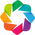

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Country,Humidity,Max Temp,Cloudiness,Wind Speed)

In [35]:
%%capture --no-display
# Enable holoviews with geoviews and Bokeh backend
hv.extension('bokeh')
gv.extension('bokeh')

# Create points from the 'city_data_df' DataFrame for visualization
points = gv.Points(
    city_data_df, 
    ['Lng', 'Lat'],  # Coordinates for mapping
    ['City', 'Country', 'Humidity', 'Max Temp', 'Cloudiness', 'Wind Speed']  # Data shown on hover
)

# Define a function to scale the size of points based on the Humidity column
def size_scaler(humidity):
    return (humidity / cities_df['Humidity'].max()) * 5  # Scale between 0 and 5 for smaller points

# Customize the map plot directly using the .opts method with size_fn
map_plot = points.opts(
    tools=['hover'],
    size='Humidity',  # Set point size based on humidity level
    size_fn=size_scaler,  # Apply custom size scaling function
    color='Humidity',
    cmap='viridis',
    colorbar=True,
    width=1000,
    height=600,
    alpha=0.7,  # Add transparency to better see overlapping points
    title='City Humidity Levels',
    line_color='black',  # Outline for better visibility
    marker='circle'
)

# Overlay with a base map and display the result
base_map = gv.tile_sources.EsriImagery()
city_humidity_map = base_map * map_plot

# Display the map in a Jupyter notebook environment
city_humidity_map

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE

# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
43,43,saint-pierre,-21.3393,55.4781,25.10,61,0,3.09,RE,1718607814
66,66,badger,64.8000,-147.5333,23.95,37,0,2.57,US,1718607841
102,102,ust'-kulom,61.6864,53.6902,21.21,43,0,3.85,RU,1718607882
120,120,emerald,-23.5333,148.1667,22.41,28,0,2.43,AU,1718607904
130,130,newman,37.3138,-121.0208,21.13,51,0,1.79,US,1718607916
138,138,fort bragg,35.1390,-79.0060,22.32,80,0,0.00,US,1718607716
146,146,laguna,38.4210,-121.4238,23.16,52,0,2.06,US,1718607935
160,160,nova vicosa,-17.8919,-39.3719,21.66,87,0,1.27,BR,1718607707
170,170,fort myers shores,26.7092,-81.7459,26.67,95,0,3.09,US,1718607962
176,176,trinity beach,-16.7888,145.6968,26.67,44,0,3.60,AU,1718607970


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

,City,Country,Lat,Lng,Humidity,Hotel Name
43,saint-pierre,RE,-21.3393,55.4781,61,
66,badger,US,64.8000,-147.5333,37,
102,ust'-kulom,RU,61.6864,53.6902,43,
120,emerald,AU,-23.5333,148.1667,28,
130,newman,US,37.3138,-121.0208,51,
138,fort bragg,US,35.1390,-79.0060,80,
146,laguna,US,38.4210,-121.4238,52,
160,nova vicosa,BR,-17.8919,-39.3719,87,
170,fort myers shores,US,26.7092,-81.7459,95,
176,trinity beach,AU,-16.7888,145.6968,44,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = # YOUR CODE HERE
params = {
    # YOUR CODE HERE
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = # YOUR CODE HERE
    params["bias"] = # YOUR CODE HERE

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = # YOUR CODE HERE

    # Convert the API response to JSON format
    name_address = # YOUR CODE HERE

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
saint-pierre - nearest hotel: Tropic Hotel
badger - nearest hotel: Clarion Hotel & Suites
ust'-kulom - nearest hotel: No hotel found
emerald - nearest hotel: Emerald Central Hotel
newman - nearest hotel: No hotel found
fort bragg - nearest hotel: Airborne Inn Lodging
laguna - nearest hotel: Holiday Inn Express & Suites
nova vicosa - nearest hotel: Pousada Pontal da Barra
fort myers shores - nearest hotel: Comfort Inn Fort Myers
trinity beach - nearest hotel: Blue Lagoon Resort
racine - nearest hotel: No hotel found
six-fours-les-plages - nearest hotel: Kyriad Direct La Seyne-sur-Mer
porto velho - nearest hotel: Hotel Slaviero Essential Porto Velho
posto fiscal rolim de moura - nearest hotel: No hotel found
port douglas - nearest hotel: Mantra Aqueous Port Douglas
roswell - nearest hotel: Best Western Plus Hotel
hell-ville - nearest hotel: ABUD HOTEL
sona - nearest hotel: Al Bosco
morehead city - nearest hotel: Bask Hotel Big Rock Landing, Trademark Collection by W

,City,Country,Lat,Lng,Humidity,Hotel Name
43,saint-pierre,RE,-21.3393,55.4781,61,Tropic Hotel
66,badger,US,64.8000,-147.5333,37,Clarion Hotel & Suites
102,ust'-kulom,RU,61.6864,53.6902,43,No hotel found
120,emerald,AU,-23.5333,148.1667,28,Emerald Central Hotel
130,newman,US,37.3138,-121.0208,51,No hotel found
138,fort bragg,US,35.1390,-79.0060,80,Airborne Inn Lodging
146,laguna,US,38.4210,-121.4238,52,Holiday Inn Express & Suites
160,nova vicosa,BR,-17.8919,-39.3719,87,Pousada Pontal da Barra
170,fort myers shores,US,26.7092,-81.7459,95,Comfort Inn Fort Myers
176,trinity beach,AU,-16.7888,145.6968,44,Blue Lagoon Resort


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)